## BIL462 Project Source Codes | 2024-2025 Fall | Context: Iris Recognition on UBIRIS.v2 Dataset

#### Step1: Sentetic Noise Addition (Image Processing)

In [ ]:
%pip install tqdm

import os
import cv2
import numpy as np
from tqdm import tqdm

In [2]:
# Hareket Bulanıklığı
def add_motion_blur(image, kernel_size=15):
    """
    Görüntüye hareket bulanıklığı uygula.
    """
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel = kernel / kernel_size
    blurred = cv2.filter2D(image, -1, kernel)
    return blurred

# Düşük Işık Simülasyonu (Gamma Düzeltme)
def apply_low_light(image, gamma=0.3):
    """
    Düşük ışık koşullarını simüle etmek için gamma düzeltmesi uygula.
    """
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in range(256)]).astype("uint8")
    low_light_image = cv2.LUT(image, table)
    return low_light_image

# Veri seti yollarını tanımla
input_folder = "CLASSES_400_300"  # Orijinal görüntülerin bulunduğu klasör
output_folder = "CLASSES_400_300_noised"  # Gürültü eklenmiş görüntülerin kaydedileceği klasör

# Çıkış klasörünü oluştur
os.makedirs(output_folder, exist_ok=True)

In [ ]:
# Tüm görüntülere filtre uygula
motion_blur_count = 0
low_light_count = 0
both_count = 0

for image_name in tqdm(os.listdir(input_folder)):
    image_path = os.path.join(input_folder, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Error reading image {image_path}")
        continue
    noisy_image = image.copy()

    filters = np.random.choice(["motion_blur", "low_light", "both"], p=[0.4, 0.4, 0.2])

    if filters == "motion_blur":
        noisy_image = add_motion_blur(noisy_image, kernel_size=15)
        motion_blur_count += 1
    elif filters == "low_light":
        noisy_image = apply_low_light(noisy_image, gamma=0.4)
        low_light_count += 1
    else:  # both
        noisy_image = add_motion_blur(noisy_image, kernel_size=15)
        noisy_image = apply_low_light(noisy_image, gamma=0.4)
        both_count += 1

    output_path = os.path.join(output_folder, image_name)
    cv2.imwrite(output_path, noisy_image)

total_images = len(os.listdir(input_folder))
print("Gürültü eklenmiş görüntüler başarıyla oluşturuldu.")
print("Görüntü sayısı:", total_images)
print("Çıkış klasörü:", output_folder)
print("Filtre Uygulanma Oranı (motion_blur):", motion_blur_count / total_images)
print("Filtre Uygulanma Oranı (low_light):", low_light_count / total_images)
print("Filtre Uygulanma Oranı (both):", both_count / total_images)
                                                                                                

#### Step2: Data Augmentation

In [ ]:
import numpy as np
import glob
import cv2
import os

# Pathler
input_folder = r"CLASSES_400_300"
output_folder = r"CLASSES_400_300_augmented"
os.makedirs(output_folder, exist_ok=True)

# Fonksiyonlar
def rotate_image(image, label, number):
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    output_path = os.path.join(output_folder, f"{label}_rotate_{number}.jpg")
    cv2.imwrite(output_path, rotated_image)

def flip_image(image, direction, label, number):
    flipped_image = cv2.flip(image, direction)
    output_path = os.path.join(output_folder, f"{label}_flip_{direction}_{number}.jpg")
    cv2.imwrite(output_path, flipped_image)

def add_light(image, gamma, label, number):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    brightened_image = cv2.LUT(image, table)
    output_path = os.path.join(output_folder, f"{label}_light_{gamma}_{number}.jpg")
    cv2.imwrite(output_path, brightened_image)

# Veri artırımı fonksiyonu
def augment_images(input_folder, percentage):
    """
    Belirtilen klasördeki görüntüleri artırır ve belirtilen yüzde kadar yeni görüntü üretir.
    Args:
        input_folder (str): Girdi görüntülerinin bulunduğu klasör yolu.
        percentage (float): Üretilecek yeni görüntülerin yüzdesi.
    Returns:
        None
    İşlem:
        - Girdi klasöründeki tüm .tiff dosyalarını alır.
        - Toplam görüntü sayısına göre hedeflenen yeni görüntü sayısını hesaplar.
        - Her bir görüntü için veri artırımı işlemleri gerçekleştirir:
            - Görüntüyü döndürme
            - Görüntüyü çevirme
            - Görüntünün parlaklığını artırma
            - Görüntünün parlaklığını azaltma
        - Belirtilen yüzdeye ulaşıldığında işlemi durdurur.
        - Üretilen görüntü sayısını ve yüzdesini ekrana yazdırır.
    """
    images = glob.glob(os.path.join(input_folder, "*.tiff"))
    total_images = len(images)
    target_count = int(total_images * (percentage / 100))  # Yüzdelik hedef sayısı
    count = 0
    
    for filepath in images:
        if count >= target_count:  # Belirtilen yüzdeye ulaşıldığında dur
            break
        
        filename = os.path.basename(filepath)
        image = cv2.imread(filepath)
        label = os.path.splitext(filename)[0]  # Dosya adı etiketi

        # Veri artırımı işlemleri
        rotate_image(image, label, count)
        count += 1
        if count >= target_count: break
        
        flip_image(image, 0, label, count)
        count += 1
        if count >= target_count: break
        
        add_light(image, 1.5, label, count)
        count += 1
        if count >= target_count: break
        
        add_light(image, 0.7, label, count)
        count += 1
        if count >= target_count: break
    
    print(f"{count} görüntü (%{percentage}) başarıyla üretildi ve kaydedildi.")

# Kullanıcıdan yüzdelik N değeri
N = 20  # Örneğin, toplam görüntülerin %20'si kadar üretim yapılacak
augment_images(input_folder, N)

#### Step3: Image Enhancement (DeepLearning)

In [ ]:
%pip install torch torchvision scikit-image

import os
import cv2
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [5]:
# Dataset Tanımı
class NoiseReductionDataset(Dataset):
    def __init__(self, noisy_folder, original_folder, transform=None):
        self.noisy_images = sorted(os.listdir(noisy_folder))
        self.original_images = sorted(os.listdir(original_folder))
        self.noisy_folder = noisy_folder
        self.original_folder = original_folder
        self.transform = transform

    def __len__(self):
        return len(self.noisy_images)

    def __getitem__(self, idx):
        noisy_path = os.path.join(self.noisy_folder, self.noisy_images[idx])
        original_path = os.path.join(self.original_folder, self.original_images[idx])

        noisy_image = cv2.imread(noisy_path, cv2.IMREAD_COLOR)
        original_image = cv2.imread(original_path, cv2.IMREAD_COLOR)

        if self.transform:
            noisy_image = self.transform(noisy_image)
            original_image = self.transform(original_image)

        return noisy_image, original_image, os.path.basename(noisy_path)

# Dataset Dönüşümleri
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])

# Dataset ve DataLoader
noisy_folder = "CLASSES_400_300_noised"
original_folder = "CLASSES_400_300"
dataset = NoiseReductionDataset(noisy_folder, original_folder, transform=transform)

In [6]:
# Verileri Train/Validation/Test Split Yapma
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [7]:
# DenseNet Encoder ve Karmaşık Decoder Modeli
class DenseNetModel(nn.Module):
    def __init__(self):
        super(DenseNetModel, self).__init__()
        self.encoder = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1).features
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(1024, 512, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 256, kernel_size=3, padding=1), nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 64, kernel_size=3, padding=1), nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Tanh()  # Renk bozulmalarını azaltmak için
        )

    def forward(self, x):
        original_size = x.size()[2:]  # Giriş boyutlarını kaydet
        x = self.encoder(x)  # Encoder işlemi
        x = self.decoder(x)  # Decoder işlemi
        x = F.interpolate(x, size=original_size, mode="bilinear", align_corners=False)  # Giriş boyutlarına geri döndür
        return x

# Kayıp Fonksiyonu (MSE + SSIM)
class CombinedLoss(nn.Module):
    def __init__(self, data_range=1.0):
        super(CombinedLoss, self).__init__()
        self.mse = nn.MSELoss()
        self.data_range = data_range

    def forward(self, outputs, targets):
        # MSE kaybı
        mse_loss = self.mse(outputs, targets)
        
        # NumPy dizilerine dönüştürme
        outputs_np = outputs.detach().cpu().numpy()
        targets_np = targets.cpu().numpy()
        
        # SSIM hesabı (data_range parametresi eklendi)
        ssim_loss = np.mean([
            1 - ssim(
                targets_np[i].transpose(1, 2, 0),
                outputs_np[i].transpose(1, 2, 0),
                channel_axis=-1,
                data_range=self.data_range
            )
            for i in range(len(outputs_np))
        ])
        
        return mse_loss + 0.5 * ssim_loss

# PSNR Hesaplama Fonksiyonu
def calculate_psnr(mse):
    return 20 * np.log10(1.0 / np.sqrt(mse))


In [8]:
# For using GPU - CUDA
# %pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

# Model, Loss Fonksiyonu ve Optimizasyon
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenseNetModel().to(device)
criterion = CombinedLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)
print("Torch Version:", torch.__version__, ", CUDA Available:", torch.cuda.is_available())

# Eğitim ve Metrik Kayıtları
train_mse, val_mse = [], []
train_ssim, val_ssim = [], []
train_psnr, val_psnr = [], []

Torch Version: 2.5.1+cu124 , CUDA Available: True


In [9]:
# Eğitim Döngüsü
num_epochs = 20
best_val_loss = float("inf")

for epoch in range(num_epochs):
    model.train()
    epoch_train_mse, epoch_train_ssim, epoch_train_psnr = 0, 0, 0

    for noisy_images, original_images, _ in tqdm(train_loader):
        noisy_images = noisy_images.to(device)
        original_images = original_images.to(device)

        # Tahmin ve kayıp hesaplama
        outputs = model(noisy_images)
        loss = criterion(outputs, original_images)

        # Geri yayılım
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Metrik hesaplama
        epoch_train_mse += loss.item()
        outputs_np = outputs.detach().cpu().numpy()
        original_np = original_images.cpu().numpy()

        batch_ssim = np.mean([
            ssim(original_np[i].transpose(1, 2, 0),
                outputs_np[i].transpose(1, 2, 0),
                channel_axis=-1,
                data_range=1.0)
            for i in range(len(outputs_np))
        ])
        epoch_train_ssim += batch_ssim

        batch_psnr = calculate_psnr(loss.item())
        epoch_train_psnr += batch_psnr

    # Ortalama değerler
    train_mse.append(epoch_train_mse / len(train_loader))
    train_ssim.append(epoch_train_ssim / len(train_loader))
    train_psnr.append(epoch_train_psnr / len(train_loader))

    # Doğrulama Performansı
    model.eval()
    epoch_val_mse, epoch_val_ssim, epoch_val_psnr = 0, 0, 0
    with torch.no_grad():
        for noisy_images, original_images, _ in val_loader:
            noisy_images = noisy_images.to(device)
            original_images = original_images.to(device)

            outputs = model(noisy_images)
            loss = criterion(outputs, original_images)

            epoch_val_mse += loss.item()
            outputs_np = outputs.cpu().numpy()
            original_np = original_images.cpu().numpy()

            batch_ssim = np.mean([
                ssim(original_np[i].transpose(1, 2, 0),
                    outputs_np[i].transpose(1, 2, 0),
                    channel_axis=-1,
                    data_range=1.0)  # Make sure your data is indeed scaled to [0,1]
                for i in range(len(outputs_np))
            ])
            epoch_val_ssim += batch_ssim

            batch_psnr = calculate_psnr(loss.item())
            epoch_val_psnr += batch_psnr

    val_mse.append(epoch_val_mse / len(val_loader))
    val_ssim.append(epoch_val_ssim / len(val_loader))
    val_psnr.append(epoch_val_psnr / len(val_loader))

    scheduler.step(val_mse[-1])

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train MSE: {train_mse[-1]:.4f}, Val MSE: {val_mse[-1]:.4f}, "
          f"Train SSIM: {train_ssim[-1]:.4f}, Val SSIM: {val_ssim[-1]:.4f}, "
          f"Train PSNR: {train_psnr[-1]:.2f}, Val PSNR: {val_psnr[-1]:.2f}")

    if val_mse[-1] < best_val_loss:
        best_val_loss = val_mse[-1]
        torch.save(model.state_dict(), "best_densenet_model.pth")

100%|██████████| 972/972 [08:06<00:00,  2.00it/s]


Epoch [1/20] - Train MSE: 0.2137, Val MSE: 0.1824, Train SSIM: 0.5906, Val SSIM: 0.6458, Train PSNR: 6.82, Val PSNR: 7.40


100%|██████████| 972/972 [07:43<00:00,  2.10it/s]


Epoch [2/20] - Train MSE: 0.1691, Val MSE: 0.1598, Train SSIM: 0.6704, Val SSIM: 0.6859, Train PSNR: 7.73, Val PSNR: 7.98


100%|██████████| 972/972 [07:23<00:00,  2.19it/s]


Epoch [3/20] - Train MSE: 0.1592, Val MSE: 0.1547, Train SSIM: 0.6884, Val SSIM: 0.6962, Train PSNR: 7.99, Val PSNR: 8.12


100%|██████████| 972/972 [07:16<00:00,  2.23it/s]


Epoch [4/20] - Train MSE: 0.1532, Val MSE: 0.1535, Train SSIM: 0.6996, Val SSIM: 0.7003, Train PSNR: 8.16, Val PSNR: 8.15


100%|██████████| 972/972 [07:14<00:00,  2.24it/s]


Epoch [5/20] - Train MSE: 0.1484, Val MSE: 0.1452, Train SSIM: 0.7084, Val SSIM: 0.7139, Train PSNR: 8.30, Val PSNR: 8.39


100%|██████████| 972/972 [07:06<00:00,  2.28it/s]


Epoch [6/20] - Train MSE: 0.1451, Val MSE: 0.1434, Train SSIM: 0.7146, Val SSIM: 0.7179, Train PSNR: 8.40, Val PSNR: 8.45


100%|██████████| 972/972 [07:08<00:00,  2.27it/s]


Epoch [7/20] - Train MSE: 0.1427, Val MSE: 0.1391, Train SSIM: 0.7192, Val SSIM: 0.7254, Train PSNR: 8.47, Val PSNR: 8.58


100%|██████████| 972/972 [07:04<00:00,  2.29it/s]


Epoch [8/20] - Train MSE: 0.1398, Val MSE: 0.1369, Train SSIM: 0.7246, Val SSIM: 0.7295, Train PSNR: 8.56, Val PSNR: 8.65


100%|██████████| 972/972 [07:24<00:00,  2.19it/s]


Epoch [9/20] - Train MSE: 0.1383, Val MSE: 0.1352, Train SSIM: 0.7275, Val SSIM: 0.7327, Train PSNR: 8.60, Val PSNR: 8.70


100%|██████████| 972/972 [07:09<00:00,  2.26it/s]


Epoch [10/20] - Train MSE: 0.1356, Val MSE: 0.1345, Train SSIM: 0.7323, Val SSIM: 0.7345, Train PSNR: 8.69, Val PSNR: 8.73


100%|██████████| 972/972 [07:02<00:00,  2.30it/s]


Epoch [11/20] - Train MSE: 0.1343, Val MSE: 0.1328, Train SSIM: 0.7349, Val SSIM: 0.7376, Train PSNR: 8.73, Val PSNR: 8.78


100%|██████████| 972/972 [07:03<00:00,  2.30it/s]


Epoch [12/20] - Train MSE: 0.1330, Val MSE: 0.1329, Train SSIM: 0.7376, Val SSIM: 0.7380, Train PSNR: 8.77, Val PSNR: 8.78


100%|██████████| 972/972 [06:58<00:00,  2.32it/s]


Epoch [13/20] - Train MSE: 0.1322, Val MSE: 0.1300, Train SSIM: 0.7391, Val SSIM: 0.7428, Train PSNR: 8.80, Val PSNR: 8.87


100%|██████████| 972/972 [07:20<00:00,  2.21it/s]


Epoch [14/20] - Train MSE: 0.1308, Val MSE: 0.1290, Train SSIM: 0.7417, Val SSIM: 0.7449, Train PSNR: 8.85, Val PSNR: 8.91


100%|██████████| 972/972 [07:07<00:00,  2.27it/s]


Epoch [15/20] - Train MSE: 0.1297, Val MSE: 0.1277, Train SSIM: 0.7439, Val SSIM: 0.7472, Train PSNR: 8.88, Val PSNR: 8.95


100%|██████████| 972/972 [06:58<00:00,  2.32it/s]


Epoch [16/20] - Train MSE: 0.1281, Val MSE: 0.1303, Train SSIM: 0.7467, Val SSIM: 0.7436, Train PSNR: 8.94, Val PSNR: 8.86


100%|██████████| 972/972 [07:05<00:00,  2.28it/s]


Epoch [17/20] - Train MSE: 0.1278, Val MSE: 0.1286, Train SSIM: 0.7475, Val SSIM: 0.7467, Train PSNR: 8.95, Val PSNR: 8.92


100%|██████████| 972/972 [07:11<00:00,  2.25it/s]


Epoch [18/20] - Train MSE: 0.1267, Val MSE: 0.1265, Train SSIM: 0.7496, Val SSIM: 0.7503, Train PSNR: 8.99, Val PSNR: 8.99


100%|██████████| 972/972 [07:02<00:00,  2.30it/s]


Epoch [19/20] - Train MSE: 0.1254, Val MSE: 0.1251, Train SSIM: 0.7520, Val SSIM: 0.7525, Train PSNR: 9.03, Val PSNR: 9.04


100%|██████████| 972/972 [07:05<00:00,  2.29it/s]


Epoch [20/20] - Train MSE: 0.1244, Val MSE: 0.1238, Train SSIM: 0.7539, Val SSIM: 0.7550, Train PSNR: 9.06, Val PSNR: 9.09


In [11]:
# Test Performansı
model.load_state_dict(torch.load("best_densenet_model.pth", weights_only=True))
model.eval()
test_mse, test_ssim, test_psnr = 0, 0, 0

denoised_folder = "CLASSES_400_300_denoised"
os.makedirs(denoised_folder, exist_ok=True)

with torch.no_grad():
    for noisy_images, original_images, file_names in tqdm(test_loader):
        noisy_images = noisy_images.to(device)
        original_images = original_images.to(device)

        outputs = model(noisy_images)
        loss = criterion(outputs, original_images)

        test_mse += loss.item()
        outputs_np = outputs.cpu().numpy()
        original_np = original_images.cpu().numpy()

        batch_ssim = np.mean([
            ssim(original_np[i].transpose(1, 2, 0),
                outputs_np[i].transpose(1, 2, 0),
                channel_axis=-1,
                data_range=1.0)
            for i in range(len(outputs_np))
        ])
        test_ssim += batch_ssim

        batch_psnr = calculate_psnr(loss.item())
        test_psnr += batch_psnr

        for i in range(outputs_np.shape[0]):
            restored = np.clip((outputs_np[i].transpose(1, 2, 0) * 255), 0, 255).astype(np.uint8)
            file_name = file_names[i]
            output_path = os.path.join(denoised_folder, file_name)
            cv2.imwrite(output_path, restored)

test_mse /= len(test_loader)
test_ssim /= len(test_loader)
test_psnr /= len(test_loader)

print(f"Test MSE: {test_mse:.4f}, Test SSIM: {test_ssim:.4f}, Test PSNR: {test_psnr:.2f}")

100%|██████████| 209/209 [01:25<00:00,  2.44it/s]

Test MSE: 0.1248, Test SSIM: 0.7532, Test PSNR: 9.05


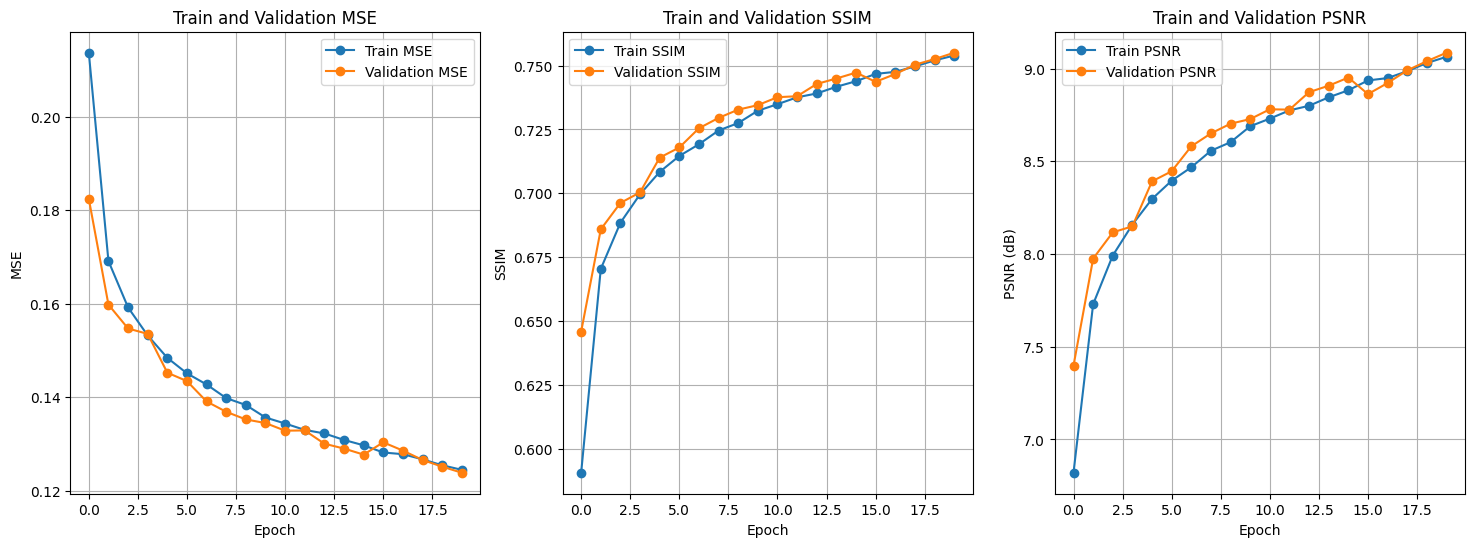

In [12]:
# Kayıp ve Metrik Grafiklerini Çiz
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(train_mse, label="Train MSE", marker="o")
plt.plot(val_mse, label="Validation MSE", marker="o")
plt.title("Train and Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(train_ssim, label="Train SSIM", marker="o")
plt.plot(val_ssim, label="Validation SSIM", marker="o")
plt.title("Train and Validation SSIM")
plt.xlabel("Epoch")
plt.ylabel("SSIM")
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(train_psnr, label="Train PSNR", marker="o")
plt.plot(val_psnr, label="Validation PSNR", marker="o")
plt.title("Train and Validation PSNR")
plt.xlabel("Epoch")
plt.ylabel("PSNR (dB)")
plt.legend()
plt.grid()

plt.savefig("metrics_densenet.png")
plt.show()